# Sequences in Orlicz spaces

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DyonOylloug/numerical_function_spaces/HEAD?labpath=docs%2Fsequences.ipynb) - link to interactive notebooks session.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm  # for progress bar

import numerical_function_spaces.orlicz_spaces as osm

In [3]:
def Orlicz_function(u):
    # return np.where(u <= 1, u ** 2, np.where(u <= 2, 2 * u - 1, u ** 3 * 3 / 8))
    # or
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            Phi[i] = u[i] ** 2
        elif u[i] <= 2:
            Phi[i] = 2 * u[i] - 1
        else:
            Phi[i] = 3 / 8 * u[i] ** 3
    return Phi

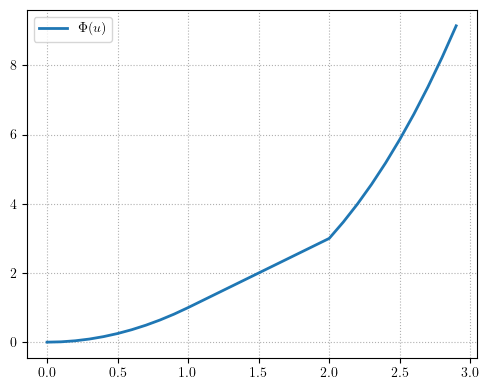

In [4]:
osm.plot_Phi(Orlicz_function, u_max=3, du=0.1)

Define sequence of characteristic functions  
\begin{equation*}
x_n(t) = \chi_{\left[0,c_n\right)}(t)
\end{equation*}
for $c_n =  \frac{n}{n_{max}}\cdot{t_{max}}$

In [5]:
def x_n(n, n_max, t_max):
    x = np.array([[1], [n / n_max * t_max]])
    return x


In [30]:
# execution took around 1 minutes
t_max = 2
n_max = 100
x_n_range = range(1, n_max, 1)  # used in calculations 

norms_1 = []
norms_2 = []
norms_inf = []

for n in tqdm(x_n_range, disable=False):  # set disable=False for progress bar
    x = x_n(n, n_max, t_max)
    norms_1.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=1))
    norms_2.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=2))
    norms_inf.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=np.inf))

100%|██████████| 99/99 [01:19<00:00,  1.24it/s]


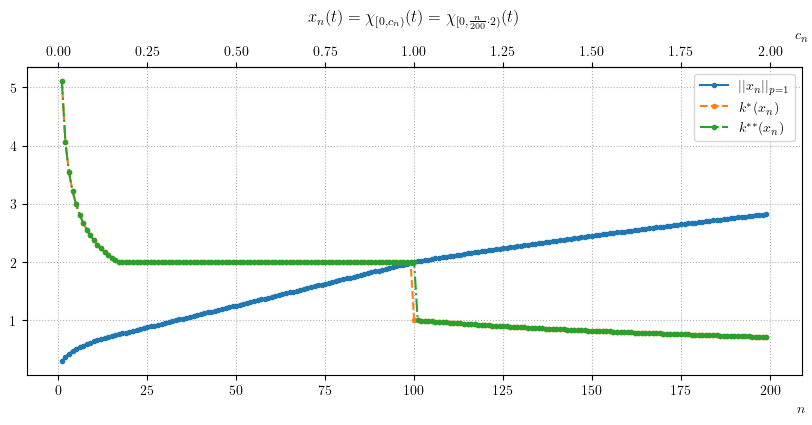

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(x_n_range, [norms_1[1] for norms_1 in norms_1], ".--", label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_1[2] for norms_1 in norms_1], '.-.', label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

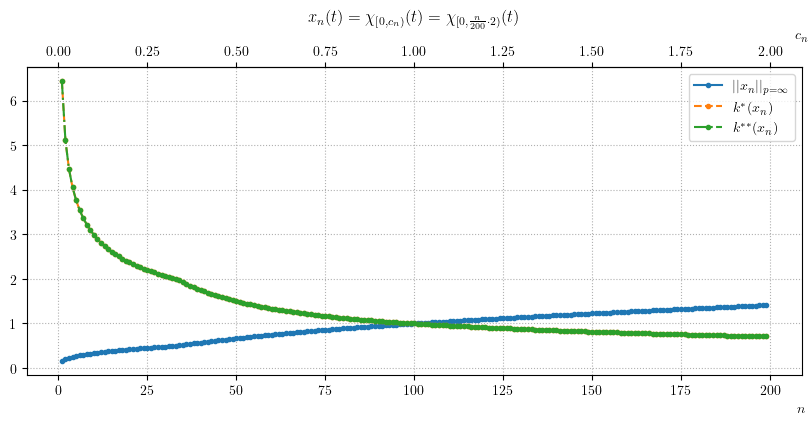

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_inf[0] for norms_inf in norms_inf], ".-", label='$||x_n||_{p=\infty}$')
ax.plot(x_n_range, [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_inf[2] for norms_inf in norms_inf], ".-.", label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
plt.legend();

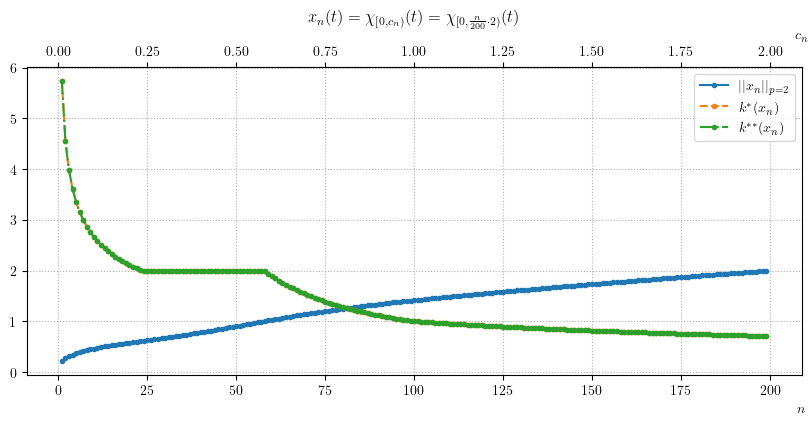

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_2[0] for norms_2 in norms_2], ".-", label='$||x_n||_{p=2}$')
ax.plot(x_n_range, [norms_2[1] for norms_2 in norms_2], ".--",
        label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_2[2] for norms_2 in norms_2], ".-.",
        label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1);
ax.legend();

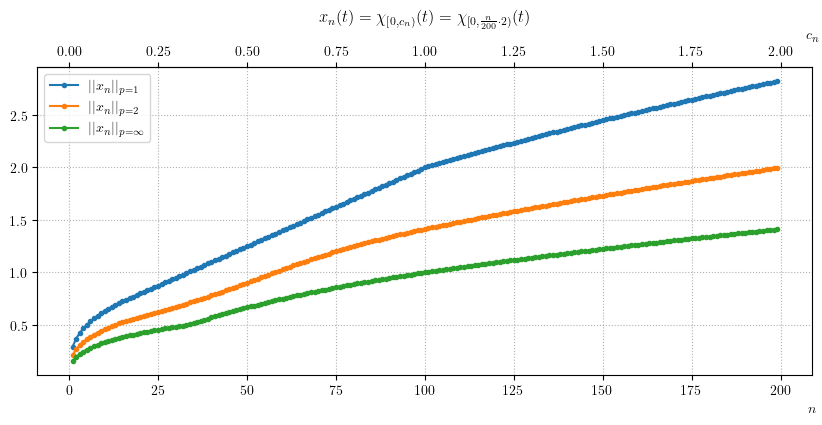

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(x_n_range, [norms_2[0] for norms_2 in norms_2], ".-", label='$||x_n||_{p=2}$')
ax.plot(x_n_range, [norms_inf[0] for norms_inf in norms_inf], ".-", label='$||x_n||_{p=\infty}$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

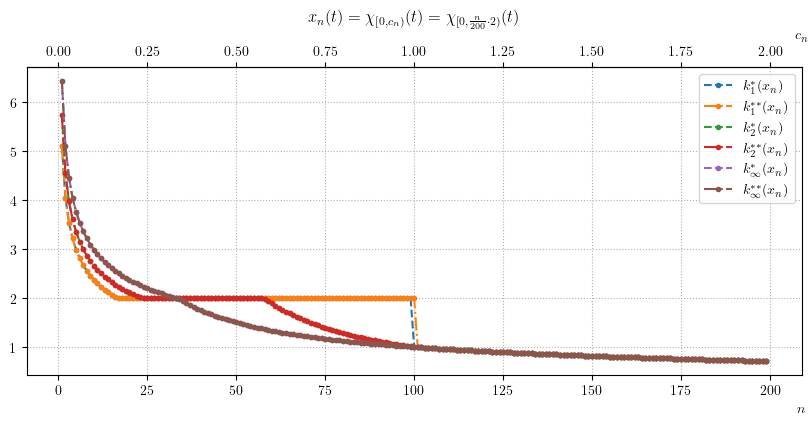

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[1] for norms_1 in norms_1], ".--", label='$k_1^*(x_n)$')
ax.plot(x_n_range, [norms_1[2] for norms_1 in norms_1], ".-.", label='$k_1^{**}(x_n)$')
ax.plot(x_n_range, [norms_2[1] for norms_2 in norms_2], ".--", label='$k_2^*(x_n)$')
ax.plot(x_n_range, [norms_2[2] for norms_2 in norms_2], ".-.", label='$k_2^{**}(x_n)$')
ax.plot(x_n_range, [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k_{{\\infty}}^*(x_n)$')
ax.plot(x_n_range, [norms_inf[2] for norms_inf in norms_inf], ".-.",
        label='$k_{{\\infty}}^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

On the first plot we may see something interesting for $x_{50} = \chi_{[0,1)}(t)$
 

In [34]:
x = x_n(50, n_max=100, t_max=2)
print(x)

[[1.]
 [1.]]


In [33]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=1)

(np.float64(1.9999999999999998),
 np.float64(1.0007275504286695),
 np.float64(1.9989074089499692))

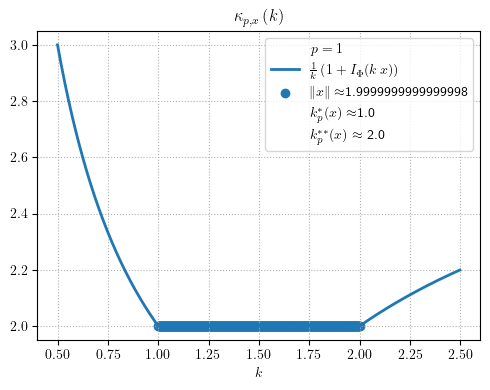

In [35]:
osm.plot_kappa(Orlicz_function, x=x, p_norm=1, k_min=0.5, k_max=2.5)

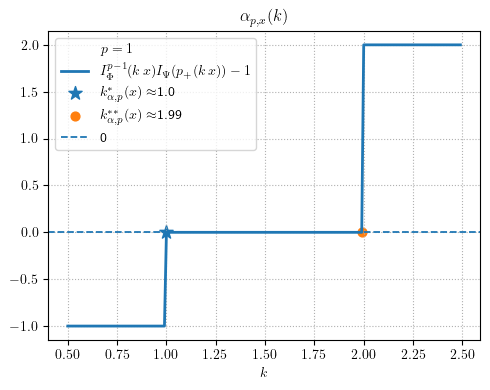

In [36]:
osm.plot_alpha(Orlicz_function, x=x, p_norm=1, du=0.01, u_max=10,
               dk=0.01, k_min=0.5, k_max=2.5)

Define another Orlicz function

In [16]:
def Orlicz_function(u):
    Phi = np.zeros(len(u))
    for i in range(len(u)):
        n = -1
        while True:
            if u[i] > n and u[i] <= n + 1:  # below two conjugated functions?
                Phi[i] = (n + 1) * u[i] - (n + 1) * n / 2
                # Phi[i] = n * u[i] - (n) * (n + 1) / 2
                break
            n = n + 1
    return Phi

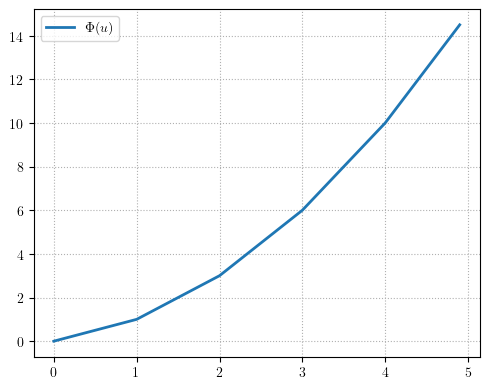

In [17]:
osm.plot_Phi(Orlicz_function, u_max=5, du=0.1)

and the same $x_n$ sequence

In [18]:
# execution took around 1 minutes
t_max = 2
n_max = 100
x_n_range = range(1, n_max, 1)  # used in calculations 

norms_1 = []
norms_2 = []
norms_inf = []

for n in tqdm(x_n_range, disable=False):  # set disable=False for progress bar
    x = x_n(n, n_max, t_max)
    norms_1.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=1))
    norms_2.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=2))
    norms_inf.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=np.inf))

100%|██████████| 99/99 [01:19<00:00,  1.24it/s]


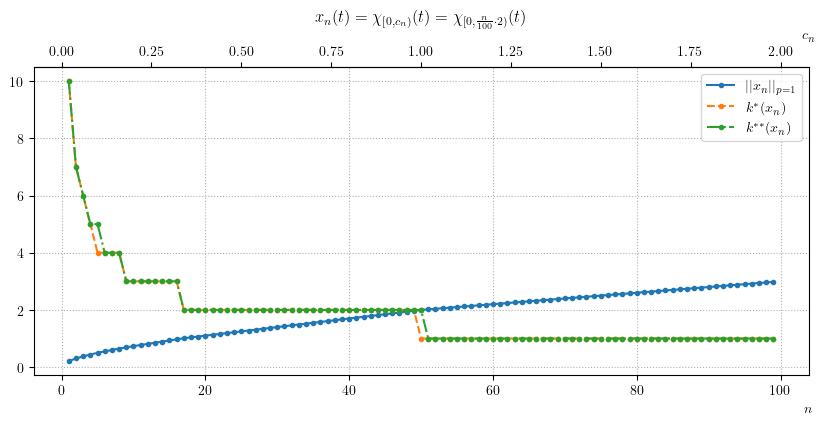

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(x_n_range, [norms_1[1] for norms_1 in norms_1], ".--", label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_1[2] for norms_1 in norms_1], '.-.', label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

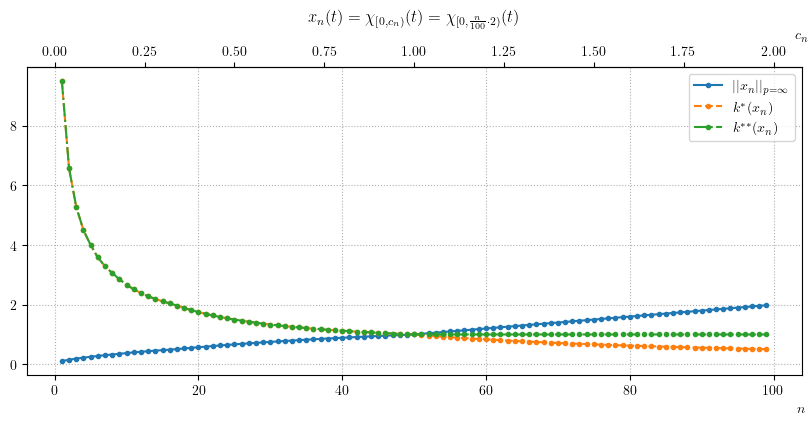

In [20]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_inf[0] for norms_inf in norms_inf], ".-", label='$||x_n||_{p=\infty}$')
ax.plot(x_n_range, [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_inf[2] for norms_inf in norms_inf], ".-.", label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
plt.legend();

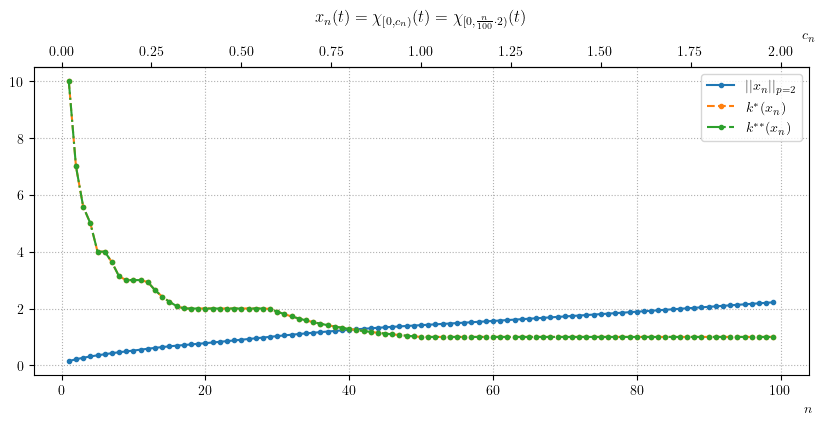

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_2[0] for norms_2 in norms_2], ".-", label='$||x_n||_{p=2}$')
ax.plot(x_n_range, [norms_2[1] for norms_2 in norms_2], ".--",
        label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_2[2] for norms_2 in norms_2], ".-.",
        label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1);
ax.legend();

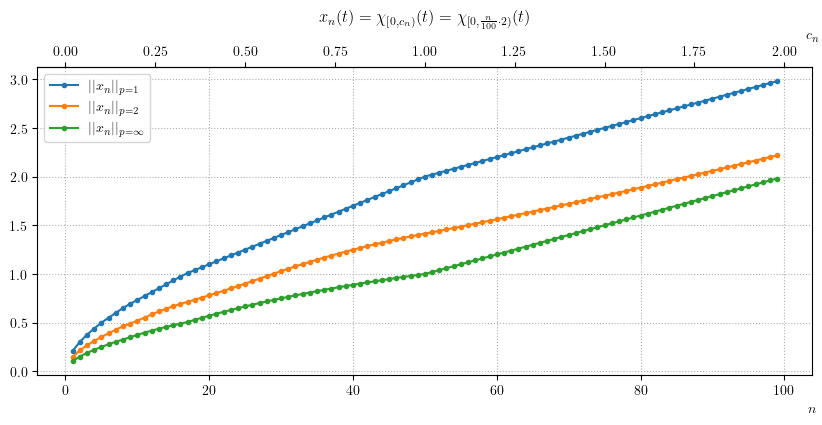

In [22]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(x_n_range, [norms_2[0] for norms_2 in norms_2], ".-", label='$||x_n||_{p=2}$')
ax.plot(x_n_range, [norms_inf[0] for norms_inf in norms_inf], ".-", label='$||x_n||_{p=\infty}$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

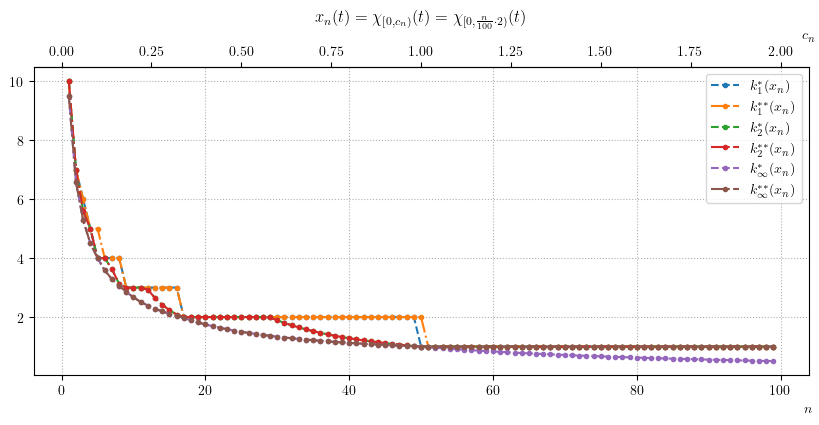

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[1] for norms_1 in norms_1], ".--", label='$k_1^*(x_n)$')
ax.plot(x_n_range, [norms_1[2] for norms_1 in norms_1], ".-.", label='$k_1^{**}(x_n)$')
ax.plot(x_n_range, [norms_2[1] for norms_2 in norms_2], ".--", label='$k_2^*(x_n)$')
ax.plot(x_n_range, [norms_2[2] for norms_2 in norms_2], ".-.", label='$k_2^{**}(x_n)$')
ax.plot(x_n_range, [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k_{{\\infty}}^*(x_n)$')
ax.plot(x_n_range, [norms_inf[2] for norms_inf in norms_inf], ".-.",
        label='$k_{{\\infty}}^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(f'$x_n(t) = \\chi_{{\\left[0,c_n\\right)}}(t) = \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

Define another sequence
\begin{equation*}
x_n(t) = \cos(t) \cdot \chi_{\left[0,c_n\right)}(t)$
\end{equation*}
for $c_n =  \frac{n}{n_{max}}\cdot{t_{max}}$

In [24]:
# execution took around 80 minutes
t_max = 2 * np.pi  # for domain of t
len_t = 1000

norms_1 = []
norms_2 = []
norms_inf = []

n_min, n_max = 1, 100

x = np.zeros(shape=(2, len_t))
x[1, :] = t_max / len_t

for n in tqdm(range(n_min, n_max), disable=False):
    for i in range(len_t):
        arg = t_max / len_t * i
        if arg < t_max * n / n_max:
            x[0, i] = np.cos(arg)

    norms_1.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=1))
    norms_2.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=2))
    norms_inf.append(osm.p_Amemiya_norm_with_stars(Orlicz_function, x, p_norm=np.inf))

100%|██████████| 99/99 [1:16:48<00:00, 46.55s/it]


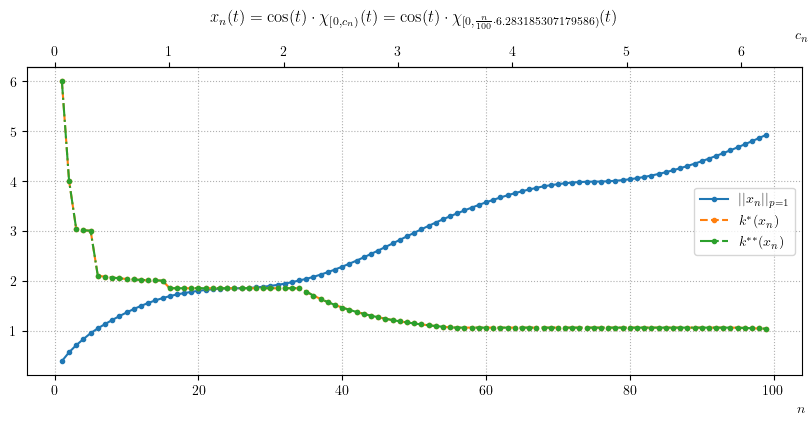

In [25]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(x_n_range, [norms_1[1] for norms_1 in norms_1], ".--", label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_1[2] for norms_1 in norms_1], '.-.', label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(
    f'$x_n(t) = \\cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

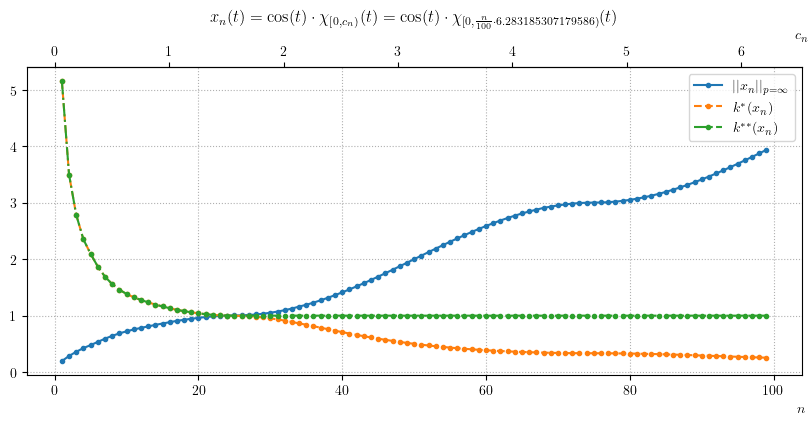

In [26]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_inf[0] for norms_inf in norms_inf], ".-", label='$||x_n||_{p=\infty}$')
ax.plot(x_n_range, [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_inf[2] for norms_inf in norms_inf], ".-.", label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(
    f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
plt.legend();

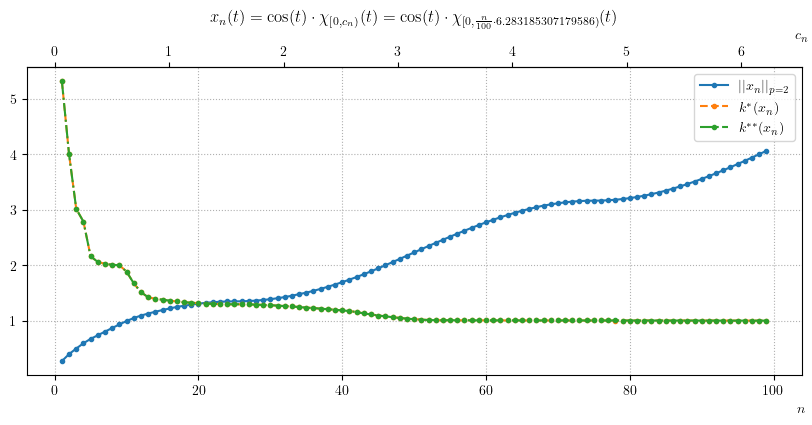

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_2[0] for norms_2 in norms_2], ".-", label='$||x_n||_{p=2}$')
ax.plot(x_n_range, [norms_2[1] for norms_2 in norms_2], ".--",
        label='$k^*(x_n)$')
ax.plot(x_n_range, [norms_2[2] for norms_2 in norms_2], ".-.",
        label='$k^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(
    f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1);
ax.legend();

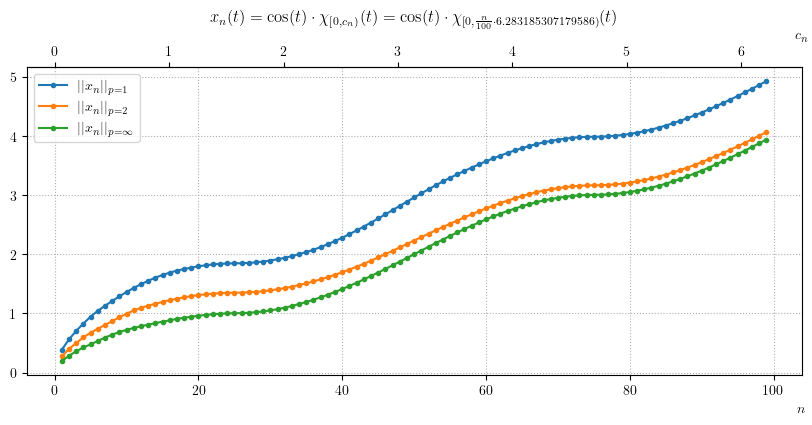

In [28]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[0] for norms_1 in norms_1], ".-", label='$||x_n||_{p=1}$')
ax.plot(x_n_range, [norms_2[0] for norms_2 in norms_2], ".-", label='$||x_n||_{p=2}$')
ax.plot(x_n_range, [norms_inf[0] for norms_inf in norms_inf], ".-", label='$||x_n||_{p=\infty}$')
ax.set_xlabel("$n$", x=1)
plt.title(
    f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();

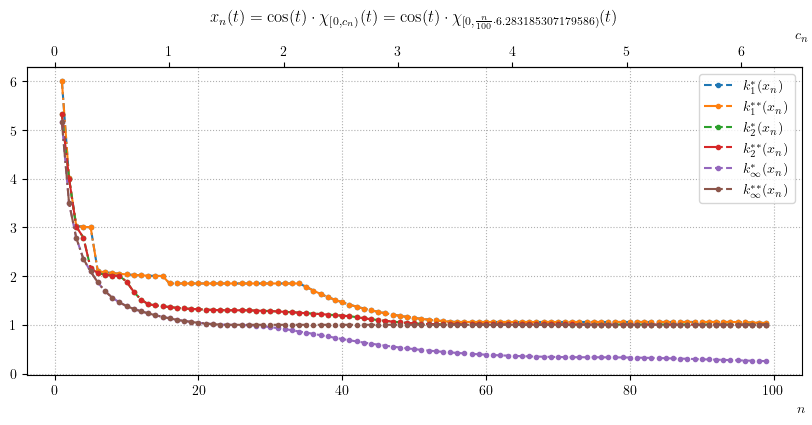

In [29]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_n_range, [norms_1[1] for norms_1 in norms_1], ".--", label='$k_1^*(x_n)$')
ax.plot(x_n_range, [norms_1[2] for norms_1 in norms_1], ".-.", label='$k_1^{**}(x_n)$')
ax.plot(x_n_range, [norms_2[1] for norms_2 in norms_2], ".--", label='$k_2^*(x_n)$')
ax.plot(x_n_range, [norms_2[2] for norms_2 in norms_2], ".-.", label='$k_2^{**}(x_n)$')
ax.plot(x_n_range, [norms_inf[1] for norms_inf in norms_inf], ".--", label='$k_{{\\infty}}^*(x_n)$')
ax.plot(x_n_range, [norms_inf[2] for norms_inf in norms_inf], ".-.",
        label='$k_{{\\infty}}^{**}(x_n)$')
ax.set_xlabel("$n$", x=1)
plt.title(
    f'$x_n(t) = \cos(t) \\cdot \\chi_{{\\left[0,c_n\\right)}}(t) = \cos(t) \\cdot \\chi_{{[0,\\frac{{n}}{{{n_max}}}\cdot{t_max})}}(t)$')
ax1 = ax.secondary_xaxis('top', functions=(lambda i: i * t_max / n_max, lambda i: i))  # po co ta druga lambda funkcja?
ax1.set_xlabel('$c_n$', x=1)
ax.legend();